In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product h.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product H,Anti Biotic Upper Respiratory,January,2019,62686,142038,447509,1
2019-02-01,Product H,Anti Biotic Upper Respiratory,February,2019,74426,168635,531319,2
2019-03-01,Product H,Anti Biotic Upper Respiratory,March,2019,91347,206976,652116,3
2019-04-01,Product H,Anti Biotic Upper Respiratory,April,2019,60600,137309,432617,4
2019-05-01,Product H,Anti Biotic Upper Respiratory,May,2019,37374,84683,266809,5
2019-06-01,Product H,Anti Biotic Upper Respiratory,June,2019,30737,69648,219428,6
2019-07-01,Product H,Anti Biotic Upper Respiratory,July,2019,29683,67255,211904,7
2019-08-01,Product H,Anti Biotic Upper Respiratory,August,2019,34788,78824,248348,8
2019-09-01,Product H,Anti Biotic Upper Respiratory,September,2019,43408,98356,309885,9


In [4]:
sales_h= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_h.shape

(60, 3)

In [6]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_h['Sales'].sum())
print('Total Market Size:',sales_h['Market Size'].sum())
print('Total Marketing Expense:', sales_h['Marketing Expense'].sum())

Total Sales: 4057933
Total Market Size: 7143631
Total Marketing Expense: 12841800


Text(0.5, 1.0, 'Product H')

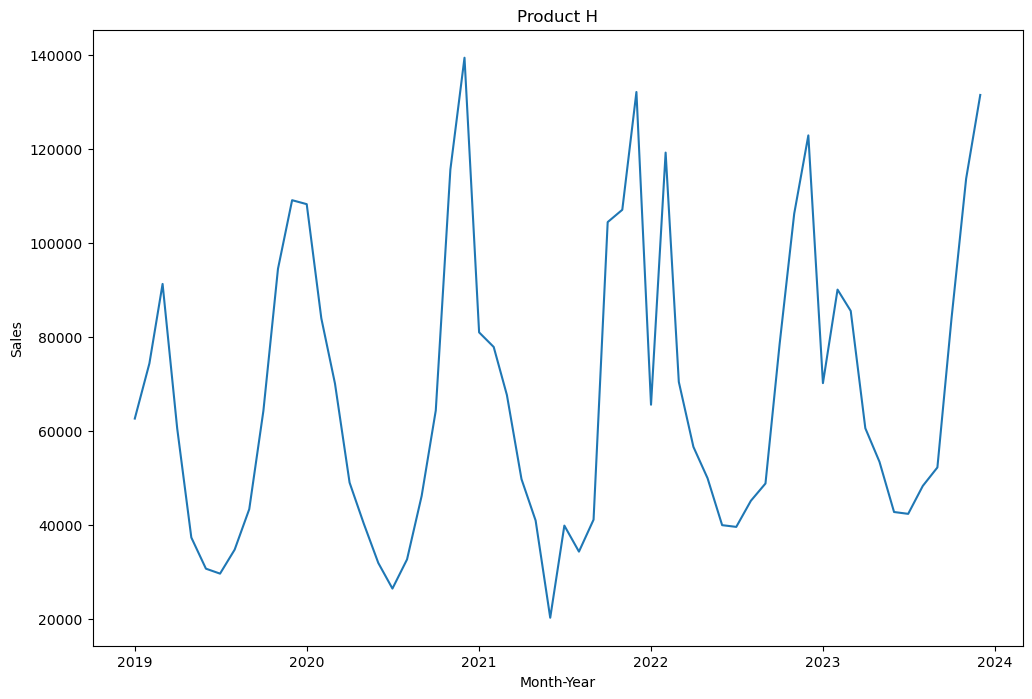

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_h['Sales'])
plt.title('Product H')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_h['Sales'])

ADF Statistics: -1.0256008967536312
p- value: 0.7438128320877682
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_h_diff= sales_h['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product H - First Difference')

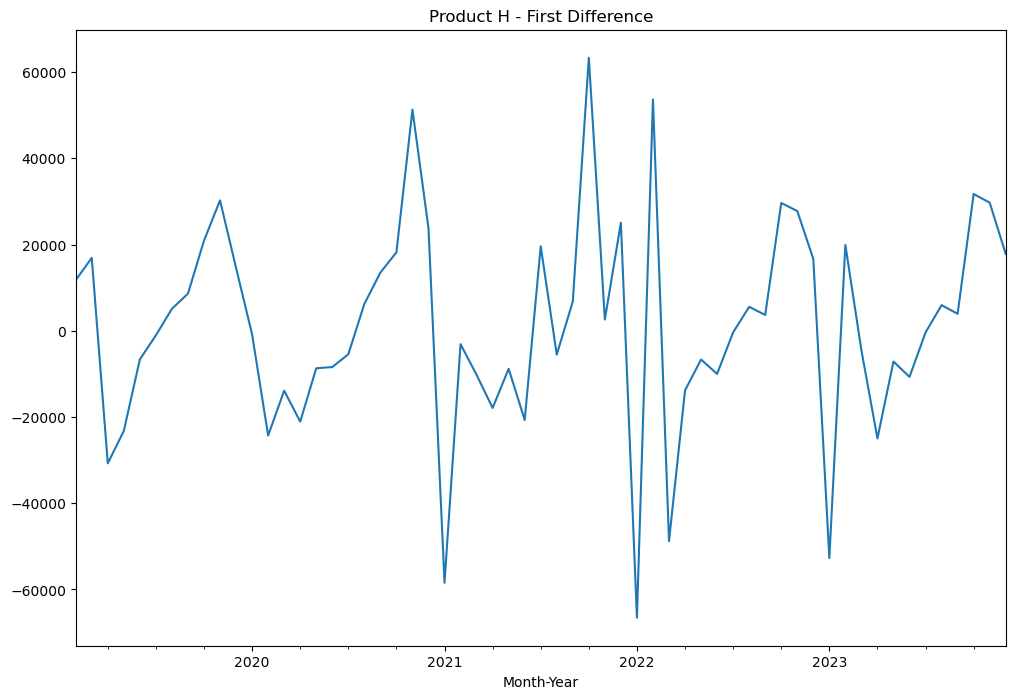

In [13]:
sales_h_diff.plot(figsize=(12,8))
plt.title('Product H - First Difference')

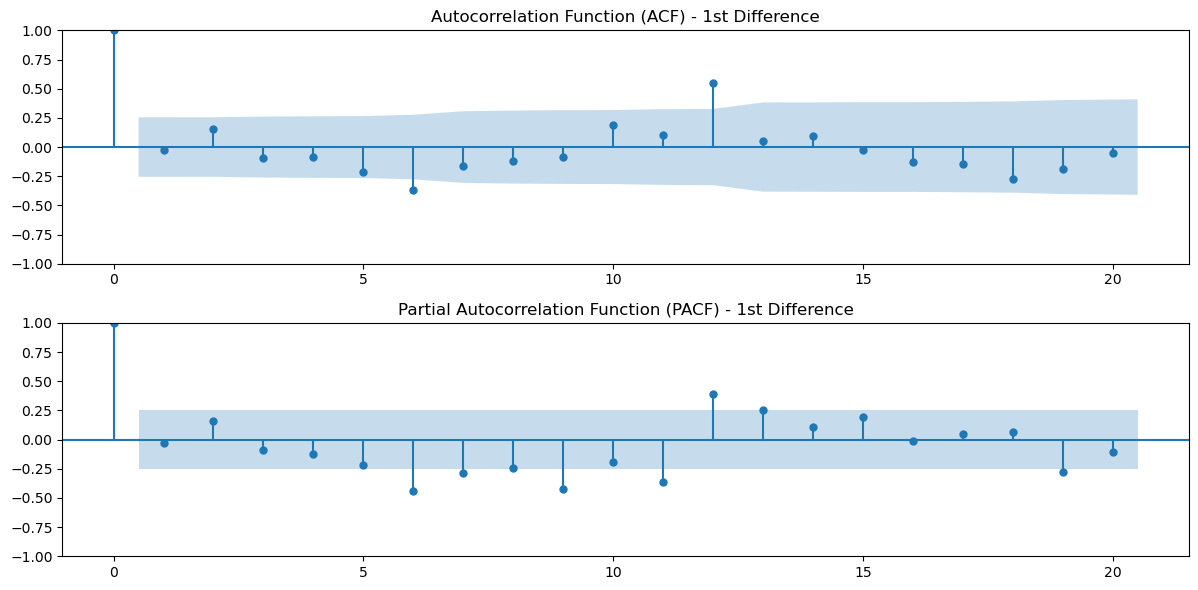

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_h_diff)

ADF Statistics: -8.916466740826941
p- value: 1.0693903940841229e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_h[:57]
test=sales_h[57:]

In [17]:
len(train)

57

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1264.860633  1272.962040  27015.575574  1.391213e+09  37298.974448
4   1  1  1265.291956  1275.418715  27726.359524  1.445127e+09  38014.819796
2   0  2  1266.178871  1276.305630  27637.329519  1.430239e+09  37818.497968
7   2  1  1267.078158  1279.230268  27592.045612  1.426204e+09  37765.112963
5   1  2  1267.881231  1280.033341  27333.830724  1.398830e+09  37400.938289
14  4  2  1268.399055  1286.627220  36367.945988  1.829800e+09  42776.163436
10  3  1  1268.878559  1283.056021  27331.335136  1.399779e+09  37413.619320
8   2  2  1269.811007  1283.988469  27347.261018  1.400412e+09  37422.073878
13  4  1  1270.547366  1286.750180  27687.748263  1.440992e+09  37960.406805
11  3  2  1270.763351  1286.966165  27361.630576  1.402079e+09  37444.347692
16  5  1  1271.610441  1289.838606  29967.472314  1.485853e+09  38546.757881
6   2  0  1273.554410  1283.681169  26787.844374  1.341921e+09  36632.238731

In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -628.430
Date:                Thu, 09 May 2024   AIC                           1264.861
Time:                        18:26:41   BIC                           1272.962
Sample:                    01-01-2019   HQIC                          1268.002
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5563      0.084      6.609      0.000       0.391       0.721
Marketing Expense    -0.0650      0.027     -2.409      0.016      -0.118      -0.012
ma.L1                -0.

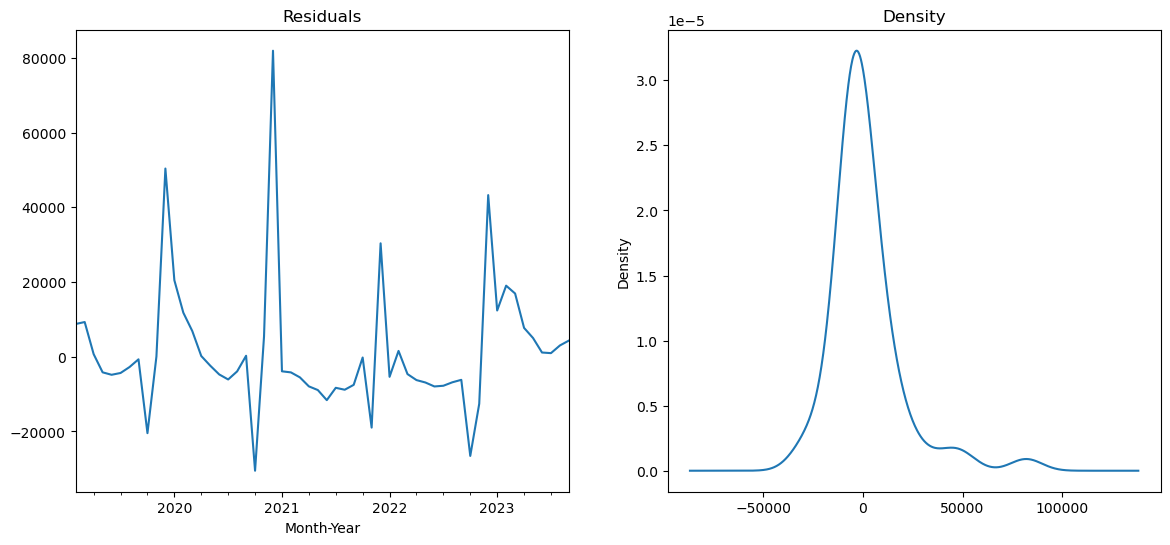

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

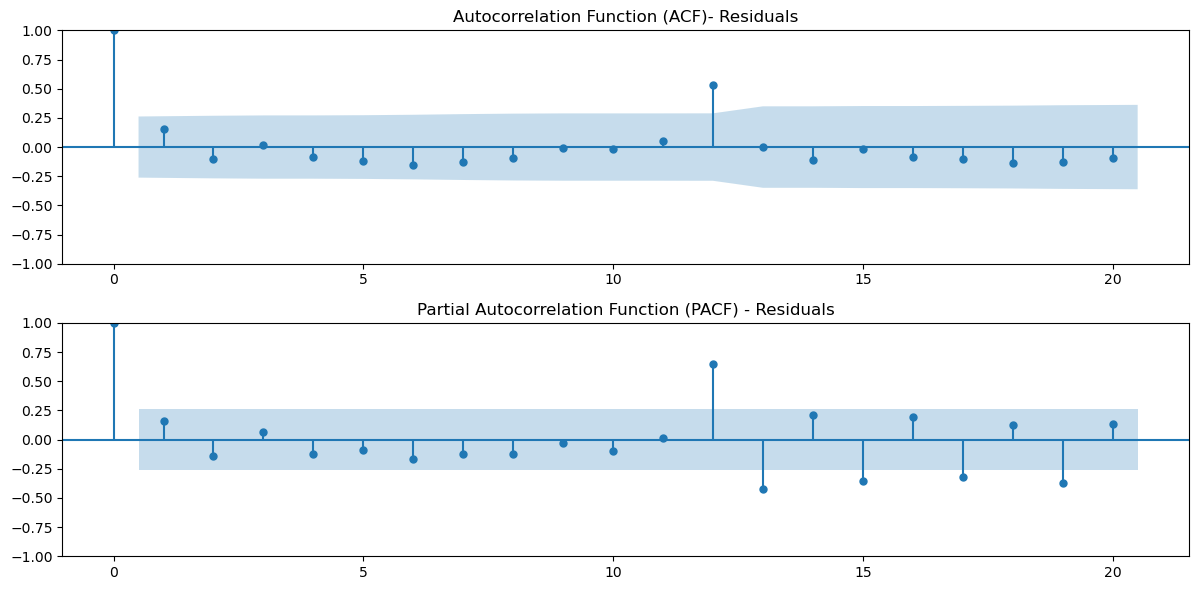

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

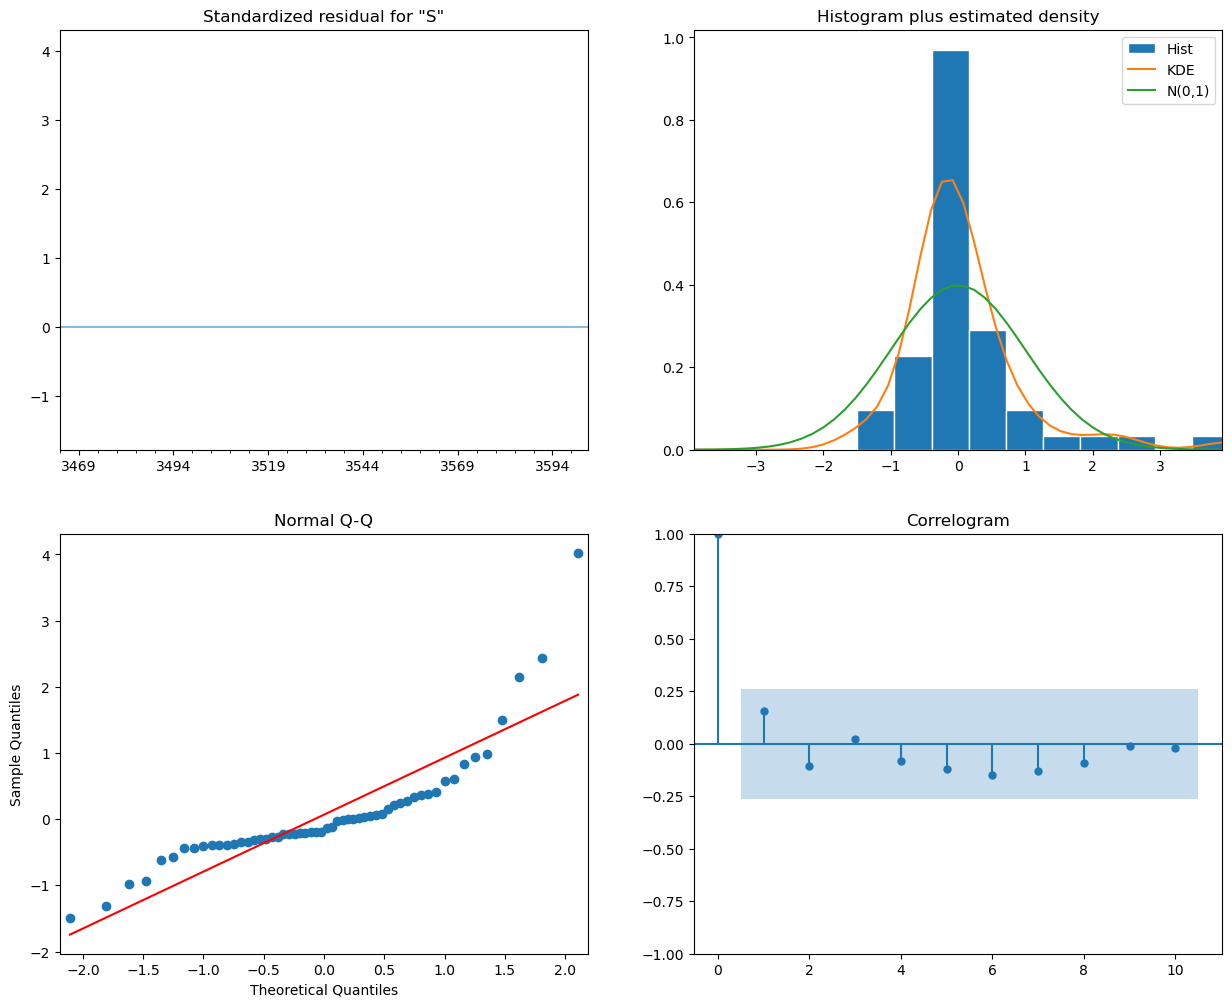

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_h['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

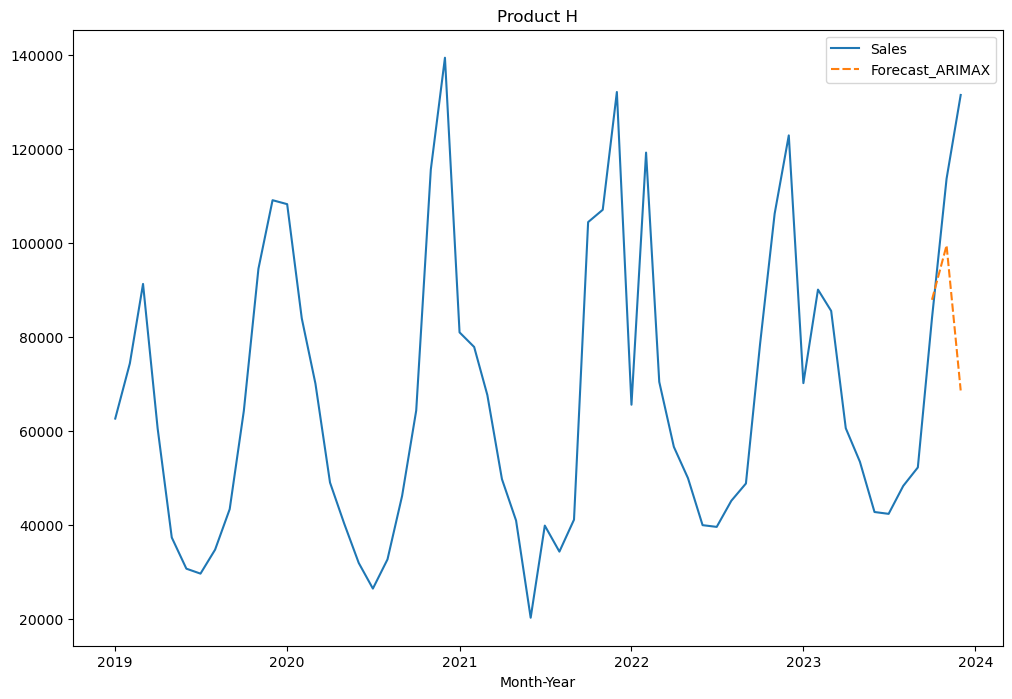

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_ARIMAX']])
plt.title('Product H')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 27015.575574280985
MAPE - ARIMAX: 0.21662997460464606
MSE - ARIMAX: 1391213494.868685
RMSE - ARIMAX: 37298.974447948094


# SARIMA

In [33]:
import statsmodels.api as sm

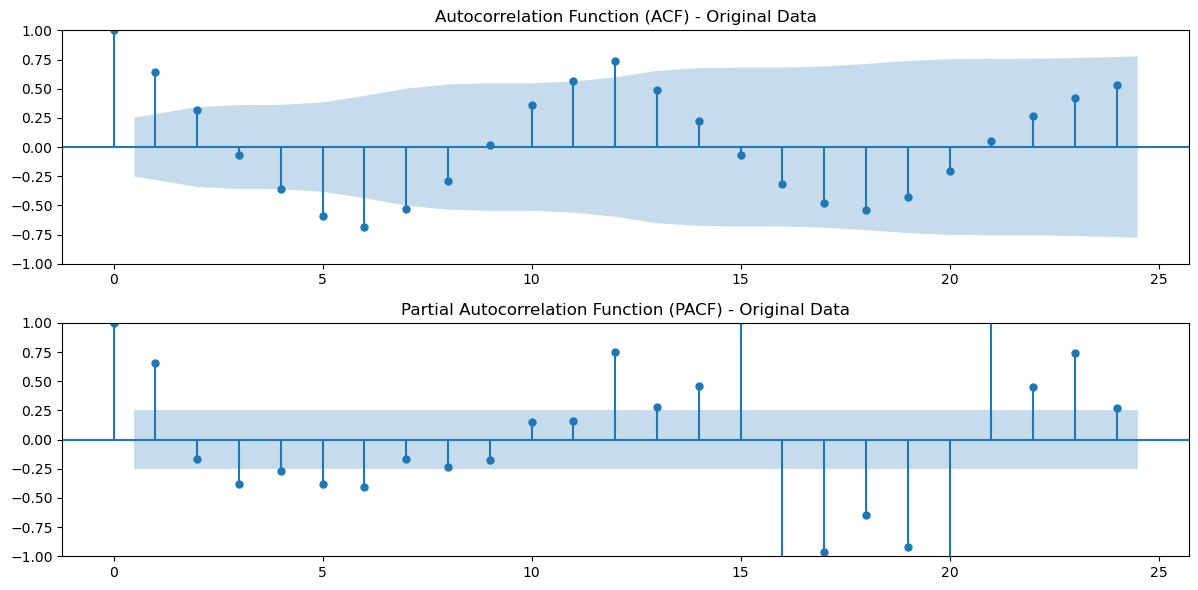

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

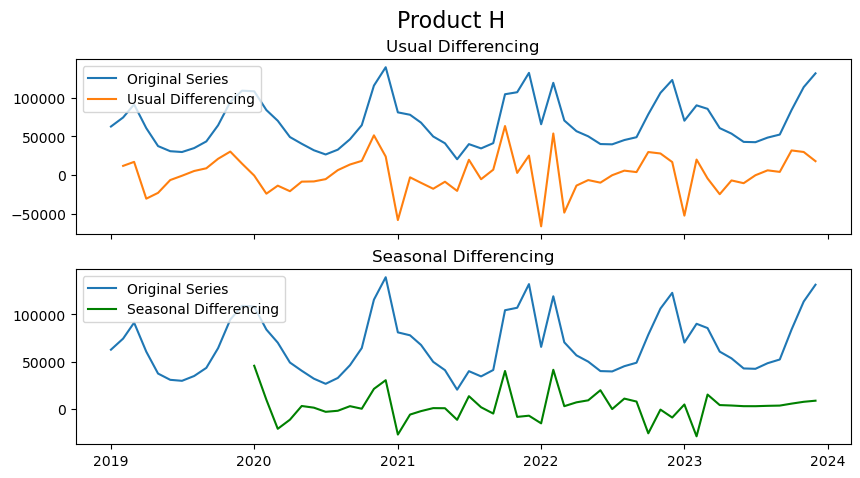

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_h['Sales'], label='Original Series')
axes[0].plot(sales_h['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_h['Sales'], label='Original Series')
axes[1].plot(sales_h['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product H', fontsize=16)
plt.show()

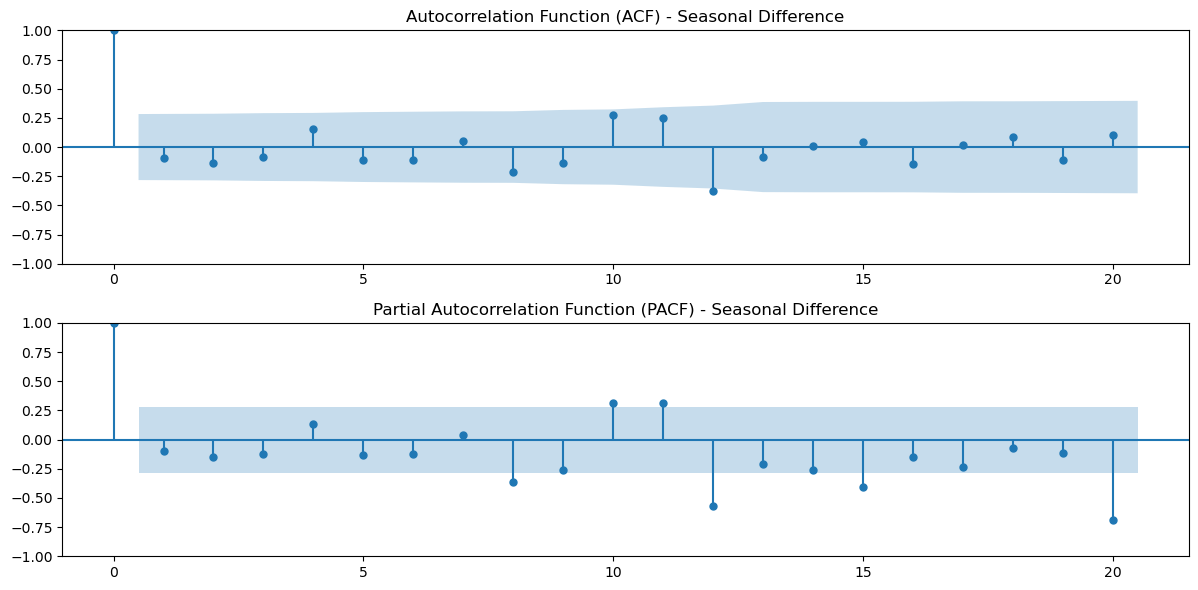

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

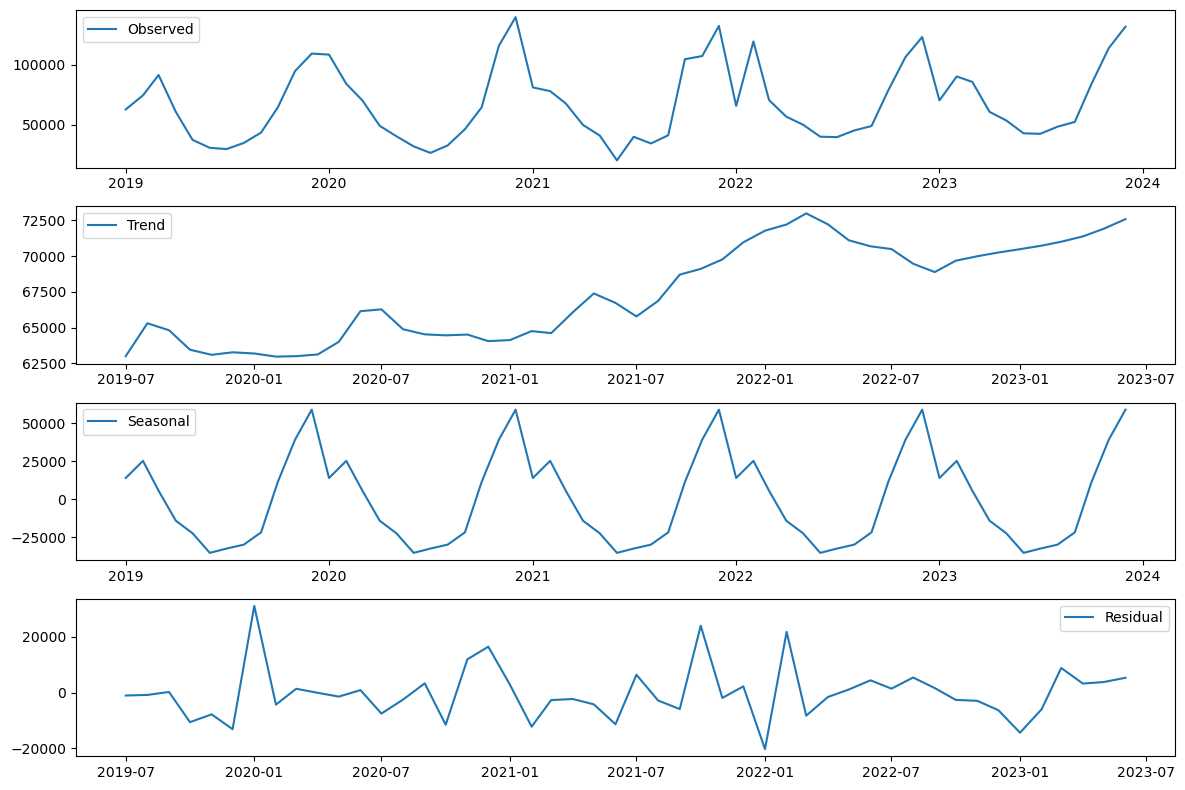

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_h['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic           mae           mse
4  2  0  970.291184  980.996322  14229.661478  2.591177e+08
6  3  0  972.255839  984.745167  14850.899717  2.789832e+08
5  2  1  972.263828  984.753156  14665.497070  2.733601e+08
8  4  0  974.184098  988.457615  15900.480806  3.039700e+08
7  3  1  974.218311  988.491828  15518.122217  2.958390e+08
1  0  1  974.302454  983.223403  10523.505440  1.288563e+08
3  1  1  975.099869  985.805007  12286.617084  1.639005e+08
9  4  1  976.187472  992.245178  15928.370860  3.046604e+08
0  0  0  977.708913  984.845672  13774.001218  1.952120e+08
2  1  0  978.388607  987.309555  12793.375730  1.809470e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   57
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -479.146
Date:                             Thu, 09 May 2024   AIC                            970.291
Time:                                     18:28:24   BIC                            980.996
Sample:                                 01-01-2019   HQIC                           974.261
                                      - 09-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5148      0.120      4.288      0.000       0.280       0.750
Market

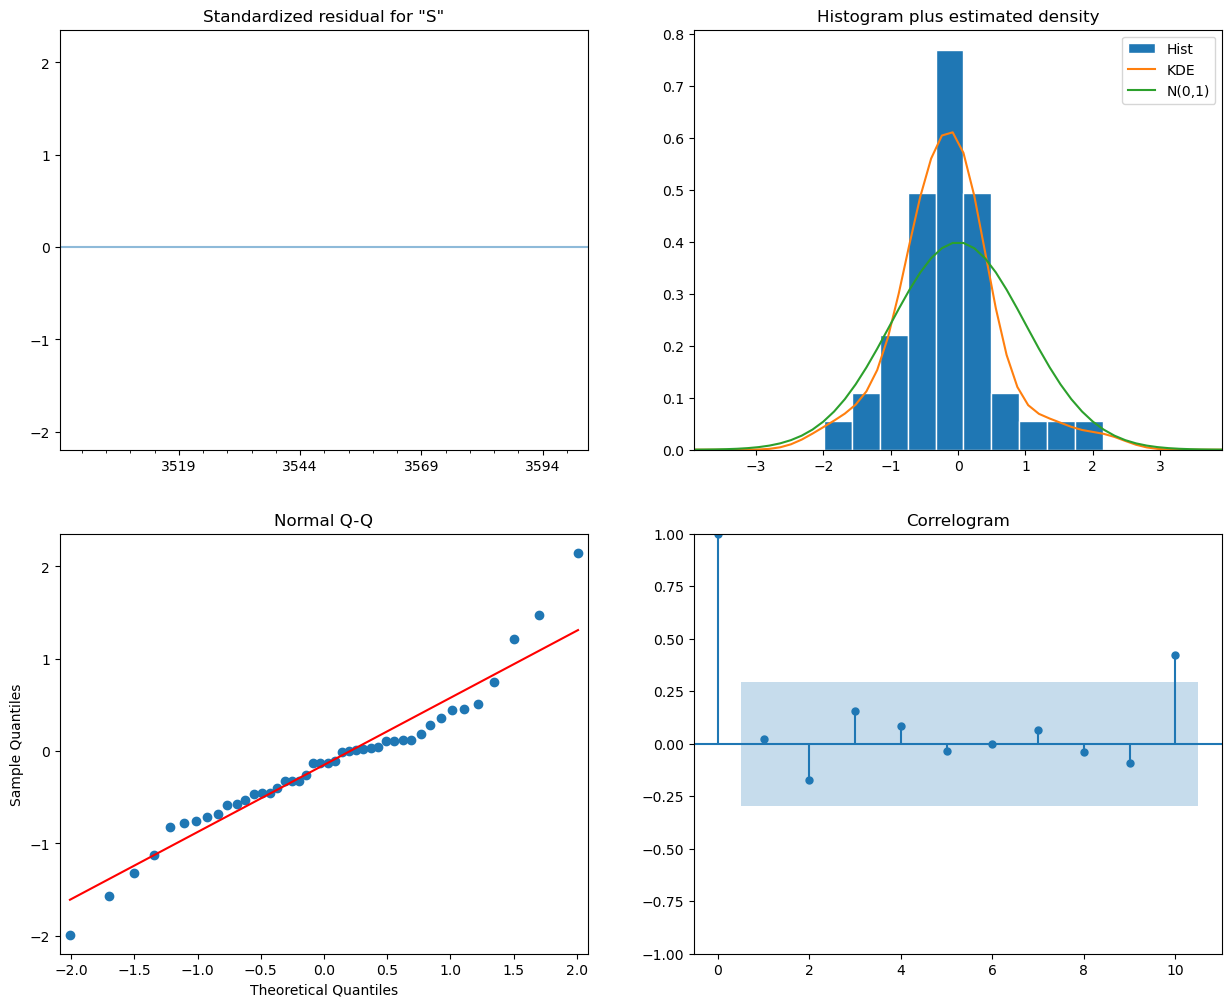

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=57, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_h['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product H')

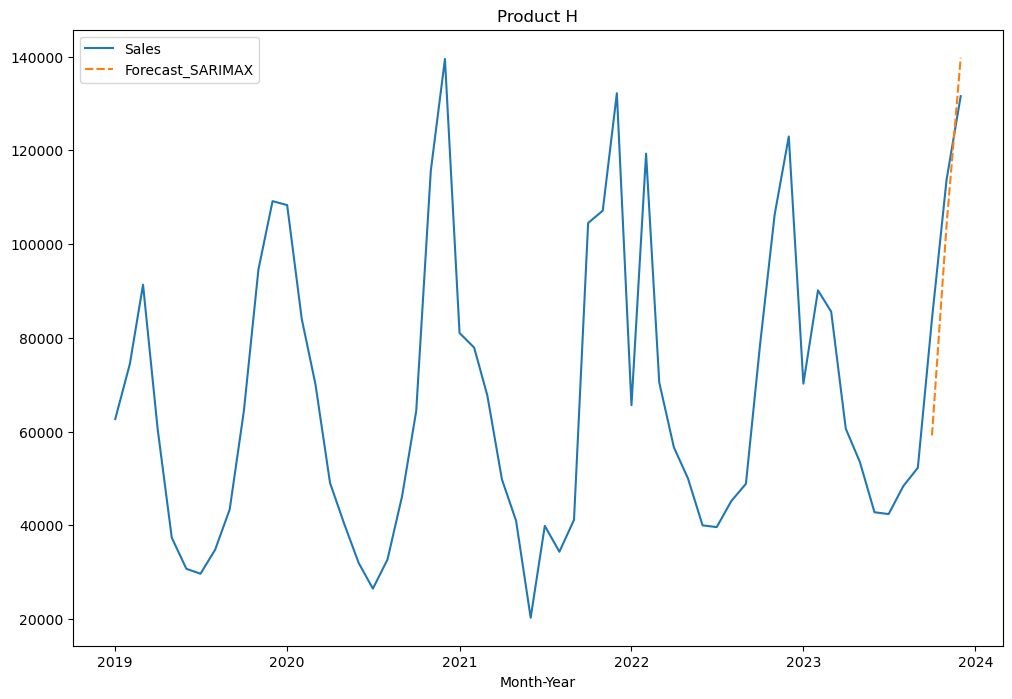

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_SARIMAX']])
plt.title('Product H')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 14229.661
MAPE - SARIMAX: 0.148
MSE - SARIMAX: 259117716.67
RMSE - SARIMAX: 16097.134


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=2,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1011.348, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1008.781, Time=0.34 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1008.320, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1011.177, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1010.103, Time=0.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1012.223, Time=0.25 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1011.566, Time=1.05 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=inf, Time=9.46 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=9.94 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=1013.453, Time=6.36 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1011.789, Time=2.76 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=1013.555, Time=5.00 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1013.789, Time=6.71 sec
 ARIMA(0,1,1)(0

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   57
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -497.987
Date:                                 Thu, 09 May 2024   AIC                           1003.973
Time:                                         18:32:24   BIC                           1011.110
Sample:                                     01-01-2019   HQIC                          1006.620
                                          - 09-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3220      0.116     -2.768      0.006      -0.550      -0.094
ma.S.L12      -0.3314      0.176     -1.879      0.060      -0.677       0.014
ma.S.L24      -0.3093      0.129     -2.400      0.016      -0.562      -0.057
sigma2      3.939e+08   1.89e-10   2.08e+18      0.000    3.94e+08    3.94e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.27   Prob(JB):                         0.34
Heteroskedasticity (H):               0.28   Skew:                            -0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.81e+33. Standard errors may be unstable.
"""

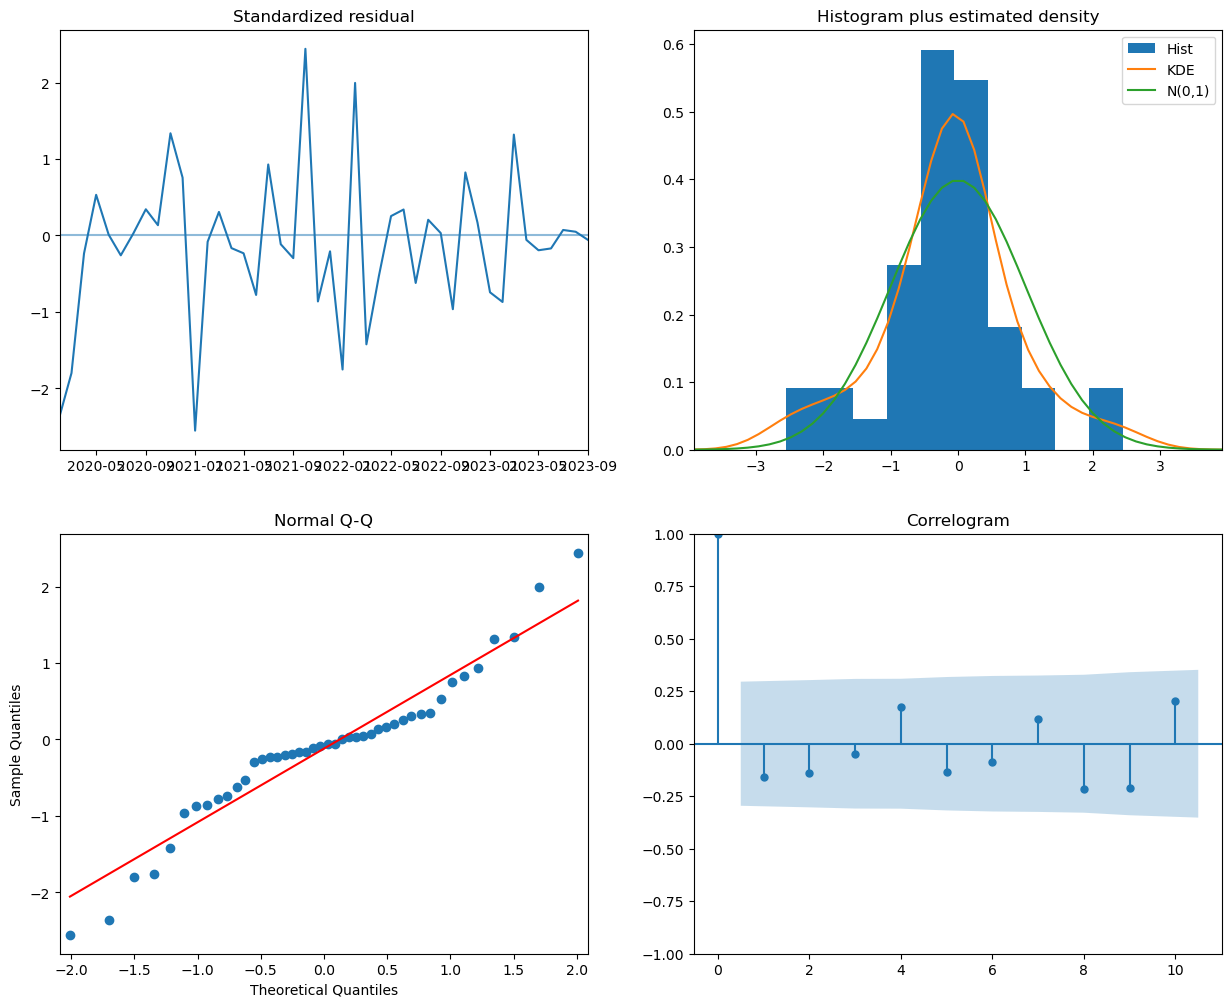

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product H')

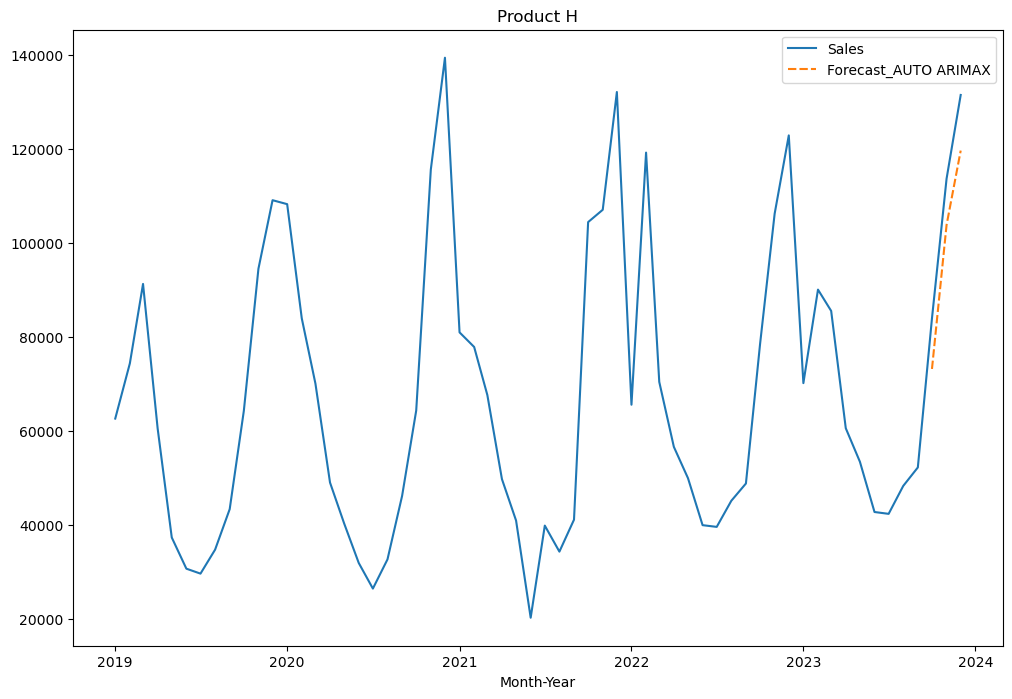

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product H')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 10816.480568599805
MAPE - AUTO ARIMAX: 0.10155632824218297
MSE - AUTO ARIMAX: 117663269.30415525
RMSE - AUTO ARIMAX: 10847.270131427318


In [53]:
sales_h.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,70232,113254,267739,NaN,NaN,NaN
2023-02-01,90139,145361,343629,NaN,NaN,NaN
2023-03-01,85600,138040,326326,NaN,NaN,NaN
2023-04-01,60633,97775,231146,NaN,NaN,NaN
2023-05-01,53500,86276,203954,NaN,NaN,NaN
2023-06-01,42800,69017,163163,NaN,NaN,NaN
2023-07-01,42408,68386,161668,NaN,NaN,NaN
2023-08-01,48352,77974,184328,NaN,NaN,NaN
2023-09-01,52288,84321,199333,NaN,NaN,NaN


In [54]:
sales_h.mean()

Sales                    67632.216667
Market Size             119060.516667
Marketing Expense       214030.000000
Forecast_ARIMAX          85394.212617
Forecast_SARIMAX        101012.196720
Forecast_AUTO ARIMAX     98960.852765
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,27015.575574,0.216630,1.391213e+09,37298.974448
AUTO ARIMAX,10816.480569,0.101556,1.176633e+08,10847.270131
SEASONAL ARIMAX,14229.661478,0.147602,2.591177e+08,16097.133803


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=6,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1001.978, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1003.977, Time=0.07 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1004.663, Time=0.29 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1003.977, Time=0.18 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1005.664, Time=0.25 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1004.797, Time=0.47 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1004.246, Time=0.87 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=1005.986, Time=1.52 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1002.903, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1004.832, Time=0.24 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1005.473, Time=0.32 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1004.846, Time=0.16 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,0

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   57
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -498.989
Date:                  Wed, 08 May 2024   AIC                           1001.978
Time:                          19:59:27   BIC                           1005.591
Sample:                      01-01-2019   HQIC                          1003.325
                           - 09-01-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2680.4667   2528.759      1.060      0.289   -2275.809    7636.743
sigma2      2.506e+08   4.56e+07      5.491      0.000    1.61e+08     3.4e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 5.16
Prob(Q):                              0.48   Prob(JB):                         0.08
Heteroskedasticity (H):               0.47   Skew:                             0.63
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product H')

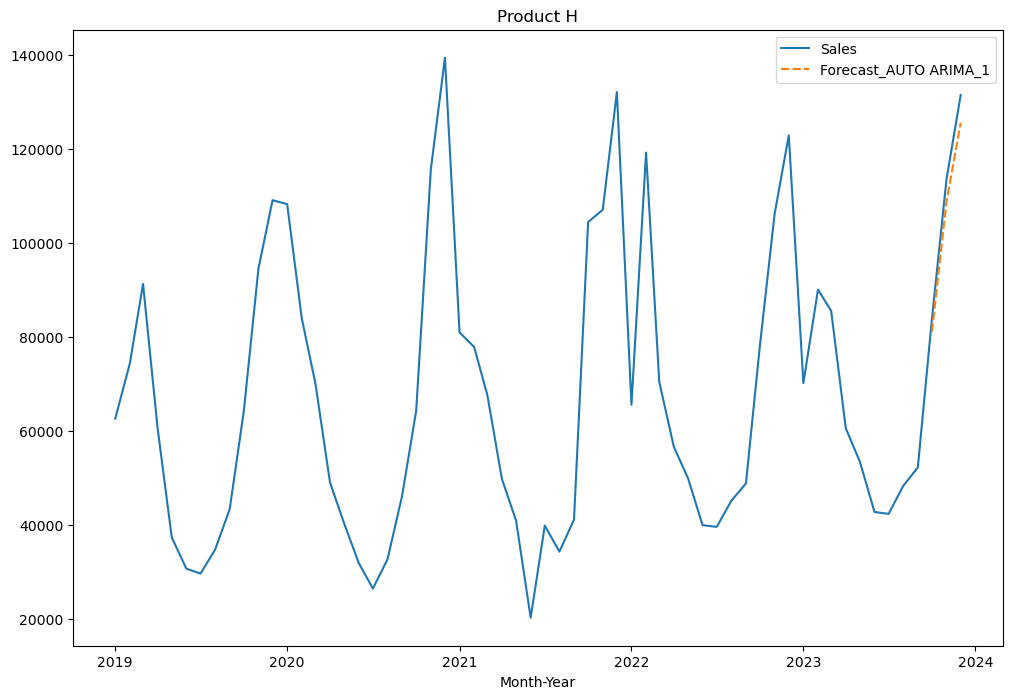

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product H')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 4501.533333333345
MAPE - AUTO ARIMA: 0.04014278744349523
MSE - AUTO ARIMA: 21910396.35111123
RMSE - AUTO ARIMA: 4680.854233055247
